<a href="https://colab.research.google.com/github/manikanta-afk/NLP/blob/main/2403a52204_manikanta_b09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import nltk
import spacy

In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!pip install nltk spacy scikit-learn matplotlib pandas
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv.zip', engine='python', on_bad_lines='skip')

In [7]:
# i am using df.head() to show first 5 entries
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# i am using df.tail() to show last 5 entries
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [9]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Separating Positive & Negative Reviews

In [12]:
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

positive_reviews = positive_reviews[:1000]
negative_reviews = negative_reviews[:1000]

In [14]:
stop_words = stopwords.words('english')

TF-IDF for Positive Reviews

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_pos = TfidfVectorizer(
    stop_words=stop_words,
    lowercase = True,
    max_features=2000
    )

In [17]:
tfidf_pos = vectorizer_pos.fit_transform(positive_reviews)
pos_scores = tfidf_pos.toarray()
pos_words = vectorizer_pos.get_feature_names_out()

pos_avg = pos_scores.mean(axis=0)

Top 15 Positive TF-IDF Words

In [18]:
pos_dict = dict(zip(pos_words, pos_avg))

top_pos = sorted(pos_dict.items(), key=lambda x: x[1], reverse=True)[:15]

pos_terms, pos_values = zip(*top_pos)

print("Top 15 Positive TF-IDF Words:")
print(pos_terms)

Top 15 Positive TF-IDF Words:
('br', 'movie', 'film', 'one', 'like', 'good', 'great', 'story', 'see', 'well', 'would', 'really', 'time', 'love', 'much')


TF-IDF for Negative Reviews

In [20]:
vectorizer_neg = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_features=2000
)

tfidf_neg = vectorizer_neg.fit_transform(negative_reviews)

neg_scores = tfidf_neg.toarray()
neg_words = vectorizer_neg.get_feature_names_out()

neg_avg = neg_scores.mean(axis=0)

Top 15 Negative TF-IDF Words

In [22]:
neg_dict = dict(zip(neg_words, neg_avg))

top_neg = sorted(neg_dict.items(), key=lambda x: x[1], reverse=True)[:15]

neg_terms, neg_values = zip(*top_neg)

print("Top 15 Negative TF-IDF Words:")
print(neg_terms)

Top 15 Negative TF-IDF Words:
('br', 'movie', 'film', 'one', 'like', 'bad', 'good', 'even', 'would', 'really', 'see', 'time', 'story', 'made', 'get')


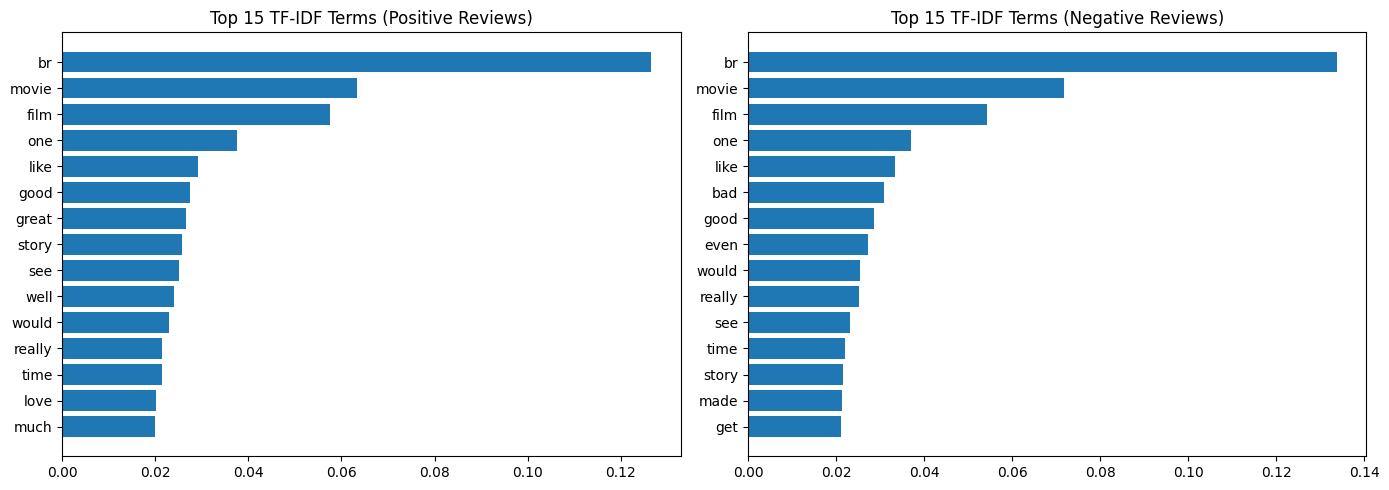

In [23]:
plt.figure(figsize=(14,5))

# at this point i am showing Positive
plt.subplot(1,2,1)
plt.barh(pos_terms, pos_values)
plt.title("Top 15 TF-IDF Terms (Positive Reviews)")
plt.gca().invert_yaxis()

# at this point i am showing Negative
plt.subplot(1,2,2)
plt.barh(neg_terms, neg_values)
plt.title("Top 15 TF-IDF Terms (Negative Reviews)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()